<a href="https://colab.research.google.com/github/TeguhFerdian/Final_project/blob/main/Pandas_Lovers_Holiday_Package_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Holiday Package Prediction**
Pandas Lovers <br>
Data Science Batch 32

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **PREPARATION**

**DATASET : HOLIDAY PACKAGE PREDICTION**

**1. PROBLEM STATEMENT**

Perusahaan traveling 'Trips & Travel.Com' membuat penawaran paket liburan terbaru. Agar lebih efektif, perusahaan ingin menyelesaikan permasalahan yang ada.
- Pada tahun lalu, hanya 18% pelanggan yang membeli paket liburan yang ditawarkan.
- Revenue perusahaan tidak mengalami peningkatan yang signifikan.

**2. GOAL**

Untuk menaikkan convertion rate dan revenue perusahaan.

**3. OBJECTIVE**

Membuat model untuk memprediksi pelanggan yang akan membeli paket liburan terbaru.

**4. BUSINESS METRICS**
- Total revenue 
- convertion rate

**IMPORT LIBRARY**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import re 
import matplotlib.patches
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
import matplotlib
print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)

3.7.1
0.12.2
1.5.3


**IMPORT DATASET**

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JodhiKrisantus/DATASET/main/Travel.csv")
df.head(5)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

# **EDA, INSIGHT & VISUALIZATION**

## **1. Descriptive Statistics**

**QUICK LOOK**

In [5]:
df.sample(5)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
998       200998          0   NaN     Self Enquiry         1              8.0   
4244      204244          0  44.0  Company Invited         1             17.0   
1928      201928          0  40.0  Company Invited         3             34.0   
982       200982          0  38.0  Company Invited         1             13.0   
3146      203146          0  31.0     Self Enquiry         3             15.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
998   Small Business    Male                       2                4.0   
4244        Salaried  Female                       3                5.0   
1928        Salaried    Male                       2                5.0   
982         Salaried    Male                       2                1.0   
3146        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
998           Basic                    3.0        Single            1.0   
4244         Deluxe                    3.0       Married            3.0   
1928       Standard                    5.0       Married            4.0   
982           Basic                    3.0       Married            2.0   
3146       Standard                    3.0       Married            7.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
998          0                       3       0                       0.0   
4244         0                       3       1                       1.0   
1928         0                       5       0                       1.0   
982          0                       3       0                       0.0   
3146         0                       3       1                       1.0   

         Designation  MonthlyIncome  
998        Executive            NaN  
4244         Manager        23935.0  
1928  Senior Manager        25932.0  
982        Executive        17610.0  
3146  Senior Manager        25942.0

In [6]:
# cek kesesuaian tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
# cek kolom kosong
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**CHECK DATA DUPLIKAT dan MISSING VALUE**

In [8]:
print('Banyak data dan kolom : ',df.shape)
print('Jumlah ID Customer duplikat : ',df['CustomerID'].duplicated().sum())
print('Jumlah data duplikat',df.duplicated().sum())

Banyak data dan kolom :  (4888, 20)
Jumlah ID Customer duplikat :  0
Jumlah data duplikat 0


In [9]:
mv=df.isnull().sum()
tmv=df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv], axis=1)
mdf.columns=['Missing Value Total', 'Missing Value Percentage (%)']
mdf

Missing Value Total  Missing Value Percentage (%)
CustomerID                                  0                      0.000000
ProdTaken                                   0                      0.000000
Age                                       226                      4.623568
TypeofContact                              25                      0.511457
CityTier                                    0                      0.000000
DurationOfPitch                           251                      5.135025
Occupation                                  0                      0.000000
Gender                                      0                      0.000000
NumberOfPersonVisiting                      0                      0.000000
NumberOfFollowups                          45                      0.920622
ProductPitched                              0                      0.000000
PreferredPropertyStar                      26                      0.531915
MaritalStatus                               0                      0.000000
NumberOfTrips                             140                      2.864157
Passport                                    0                      0.000000
PitchSatisfactionScore                      0                      0.000000
OwnCar                                      0                      0.000000
NumberOfChildrenVisiting                   66                      1.350245
Designation                                 0                      0.000000
MonthlyIncome                             233                      4.766776

<Axes: >

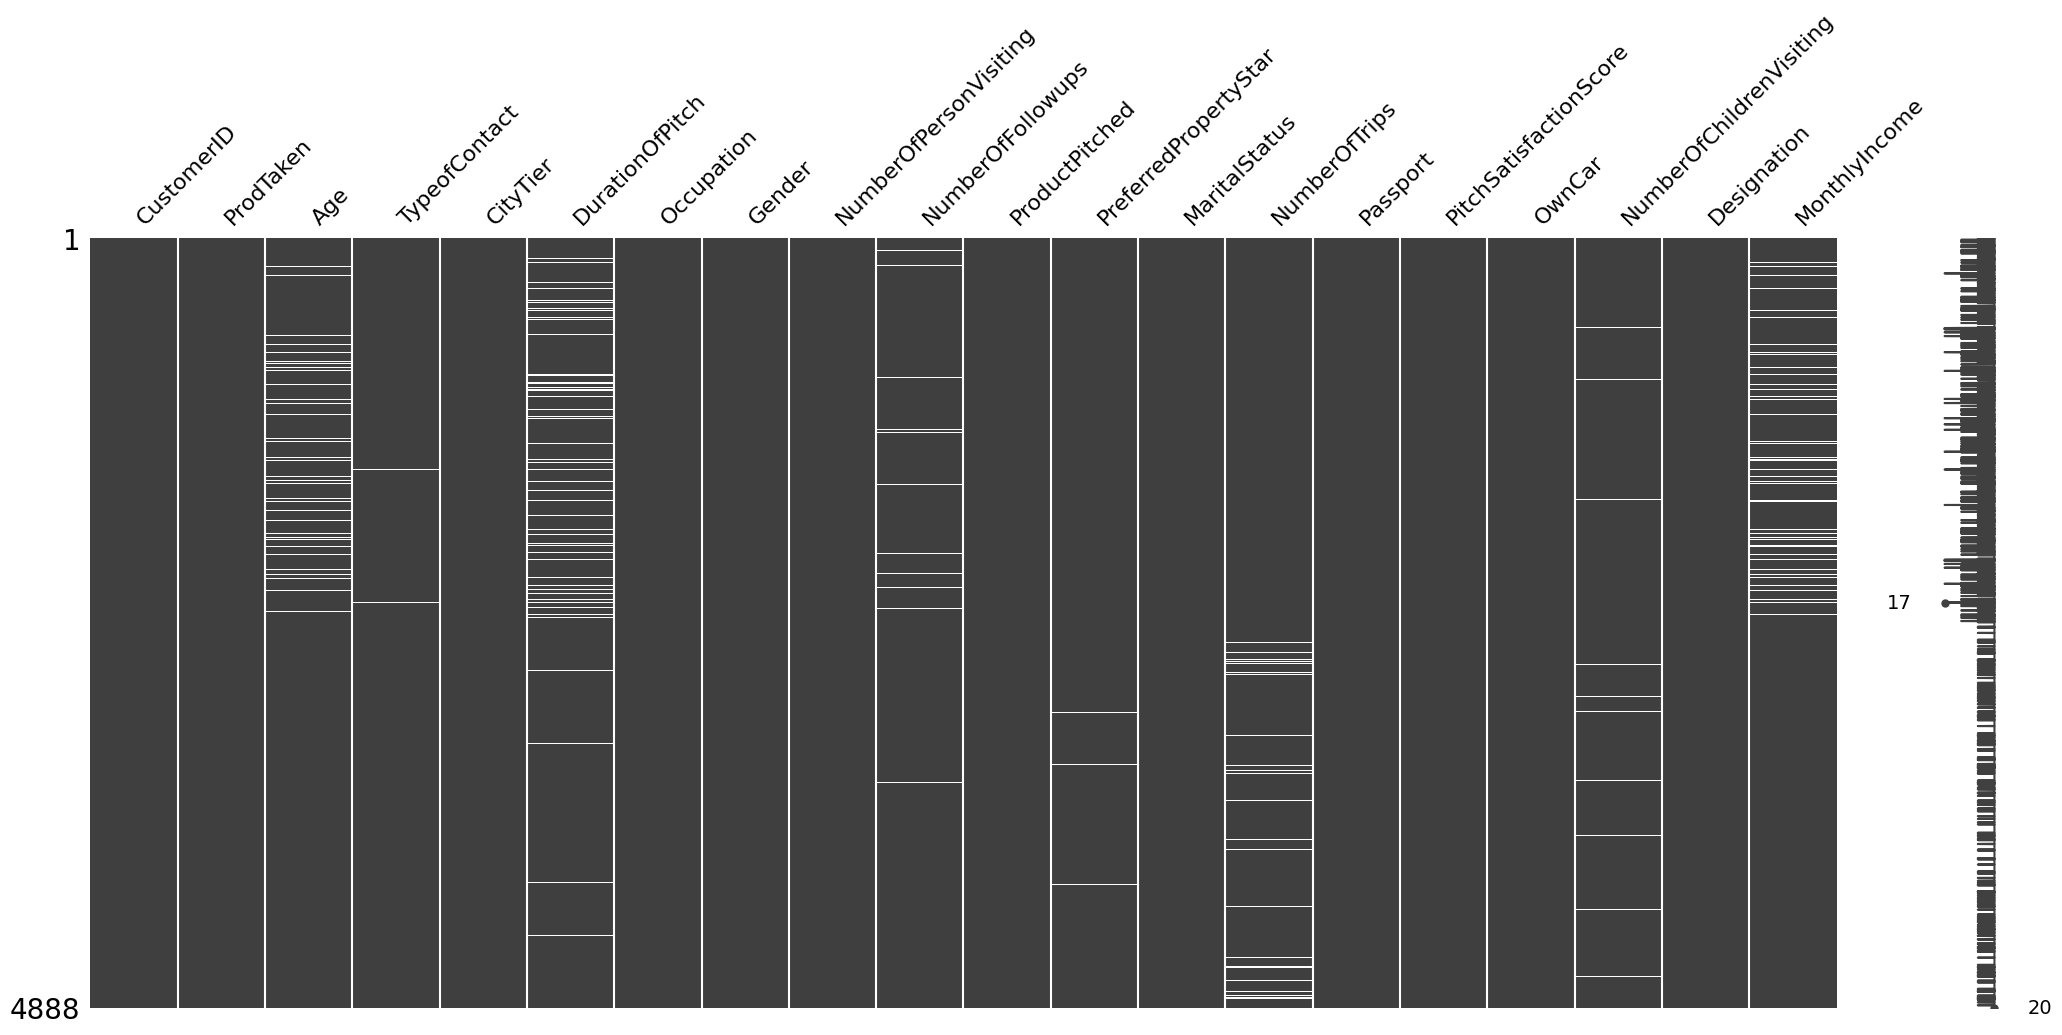

In [10]:
import missingno as msno
msno.matrix(df)

In [11]:
# pengelompokan kolom berdasarkan jenisnya
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
num         = ['Age','DurationOfPitch','MonthlyIncome']
diskrit     = ['ProdTaken','CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
              'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar', 'NumberOfChildrenVisiting']

In [12]:
# cek nilai unik pada kolom categorical
for i in categorical:
    print(df[i].value_counts(), end="\n\n")

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



In [13]:
# cek nilai summary
df.describe()

CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4662.000000  4888.000000      4637.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.316387     0.916583         8.519643   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    36.000000     1.000000        13.000000   
75%    203665.250000     0.000000    44.000000     3.000000        20.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4843.000000            4862.000000   
mean                 2.905074           3.708445               3.581037   
std                  0.724891           1.002509               0.798009   
min                  1.000000           1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  3.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  5.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4748.000000  4888.000000             4888.000000  4888.000000   
mean        3.236521     0.290917                3.078151     0.620295   
std         1.849019     0.454232                1.365792     0.485363   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max        22.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count               4822.000000    4655.000000  
mean                   1.187267   23619.853491  
std                    0.857861    5380.698361  
min                    0.000000    1000.000000  
25%                    1.000000   20346.000000  
50%                    1.000000   22347.000000  
75%                    2.000000   25571.000000  
max                    3.000000   98678.000000

In [14]:
df[diskrit].describe().T

count      mean       std  min  25%  50%  75%   max
ProdTaken                 4888.0  0.188216  0.390925  0.0  0.0  0.0  0.0   1.0
CityTier                  4888.0  1.654255  0.916583  1.0  1.0  1.0  3.0   3.0
NumberOfPersonVisiting    4888.0  2.905074  0.724891  1.0  2.0  3.0  3.0   5.0
NumberOfFollowups         4843.0  3.708445  1.002509  1.0  3.0  4.0  4.0   6.0
PreferredPropertyStar     4862.0  3.581037  0.798009  3.0  3.0  3.0  4.0   5.0
NumberOfTrips             4748.0  3.236521  1.849019  1.0  2.0  3.0  4.0  22.0
Passport                  4888.0  0.290917  0.454232  0.0  0.0  0.0  1.0   1.0
PitchSatisfactionScore    4888.0  3.078151  1.365792  1.0  2.0  3.0  4.0   5.0
OwnCar                    4888.0  0.620295  0.485363  0.0  0.0  1.0  1.0   1.0
NumberOfChildrenVisiting  4822.0  1.187267  0.857861  0.0  1.0  1.0  2.0   3.0

In [15]:
df[num].describe().T

count          mean          std     min      25%      50%  \
Age              4662.0     37.622265     9.316387    18.0     31.0     36.0   
DurationOfPitch  4637.0     15.490835     8.519643     5.0      9.0     13.0   
MonthlyIncome    4655.0  23619.853491  5380.698361  1000.0  20346.0  22347.0   

                     75%      max  
Age                 44.0     61.0  
DurationOfPitch     20.0    127.0  
MonthlyIncome    25571.0  98678.0

In [16]:
df[categorical].describe().T

count unique           top  freq
TypeofContact   4863      2  Self Enquiry  3444
Occupation      4888      4      Salaried  2368
Gender          4888      3          Male  2916
ProductPitched  4888      5         Basic  1842
MaritalStatus   4888      4       Married  2340
Designation     4888      5     Executive  1842

**HASIL OBSERVASI**

Berdasarkan output di atas, dapat disimpulkan bahwa:

- Terdapat 6 kolom dengan tipe data yang kurang sesuai, yaitu kolom `NumberOfChildrenVisiting`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, dan `Age` yang bertipe data float, sehingga nantinya harus kita ubah menjadi tipe data integer.

- Terdapat 8 kolom yang memiliki missing value, yaitu kolom `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan `MonthlyIncome`. Kolom-kolom tersebut memiliki missing value < 10% sehingga dapat dikategorikan masih relatif aman.

- Pada kolom `NumberOfTrips`, terdapat nilai max = 22 dan min = 1. Sedangkan nilai mean (3.23) lebih besar dari median (3.0). Hal ini mengindikasikan data tersebar pada nilai-nilai yang memiliki value yang kecil, atau bisa disebut terdistribusi positive skewed.

- Kolom `MonthlyIncome` memiliki mean yang lebih besar dibandingkan nilai mediannya, yang mengindikasikan sebaran data tersebut yaitu positive skewed.

- Pada kolom `MonthlyIncome` pun terlihat memiliki standard deviation yang sangat tinggi, yang mengartikan terdapat data-data yang tersebar sangat jauh dari nilai rata-rata, yang kemungkinan menandakan adanya outlier.

- Tidak terdapat data yang duplikasi pada dataset ini.

- Terdapat kesalahan value pada kolom `Gender` yaitu adanya value 'Fe Male', yang nantinya harus kita handle pada saat pre-processing data.

- Pada kolom `MaritalStatus`, terdapat value yang memiliki arti sama yaitu value 'Single' dan 'Unmarried'.

## **2. Univariate Analysis**

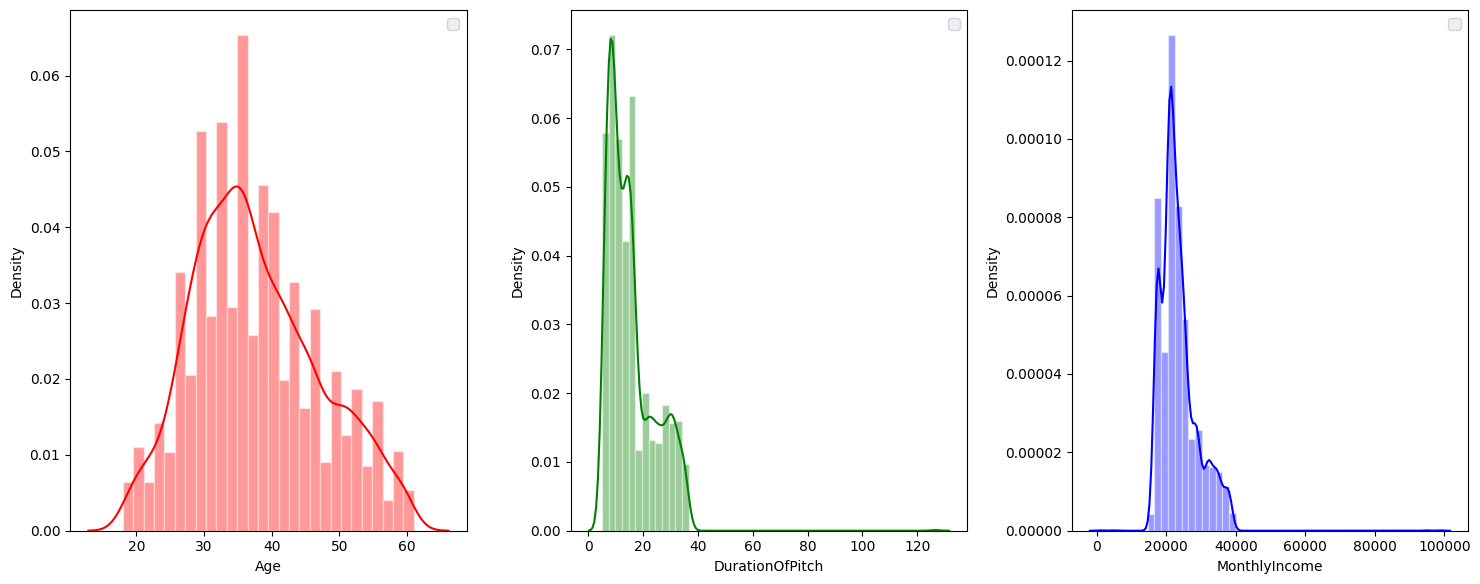

In [17]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.set_theme(style="darkgrid", palette="pastel")
colors = ['red', 'green', 'blue']

for i in range(len(num)):
    sns.distplot(df[num[i]], ax = axes[i], color=colors[i]) 
    axes[i].legend()

plt.tight_layout()
plt.show()

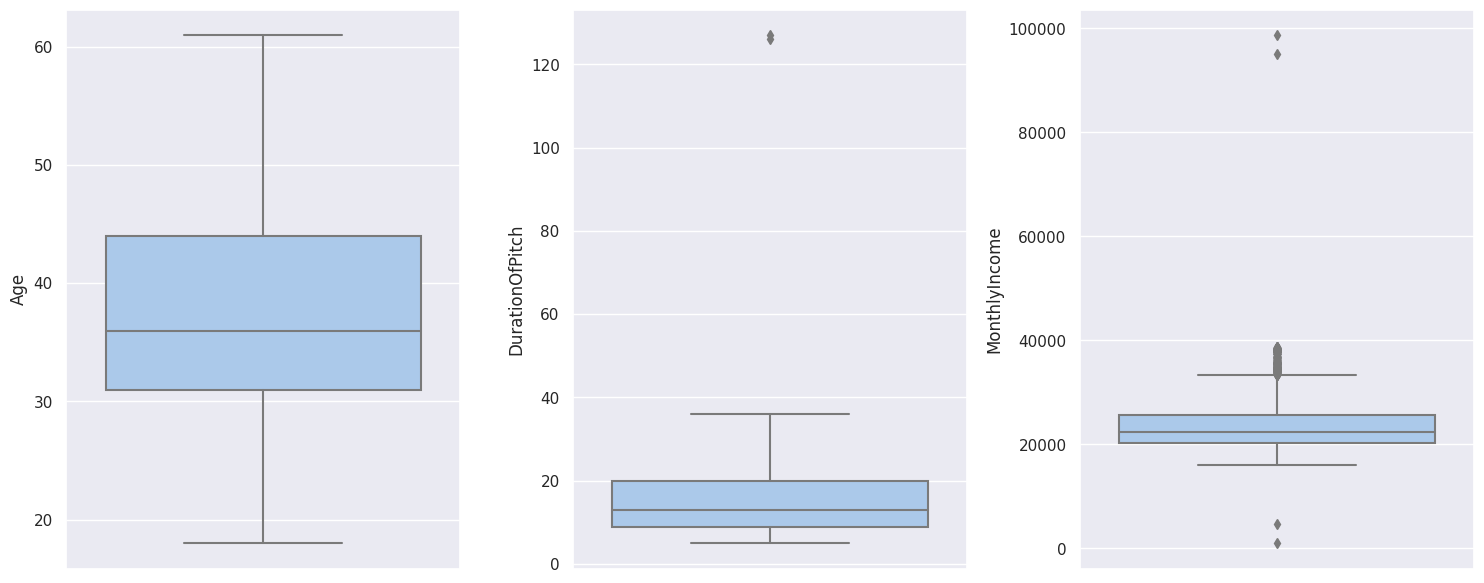

In [18]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
for i in range(len(num)):
    sns.boxplot(y=num[i], ax = axes[i], data=df)
plt.tight_layout()
plt.show()

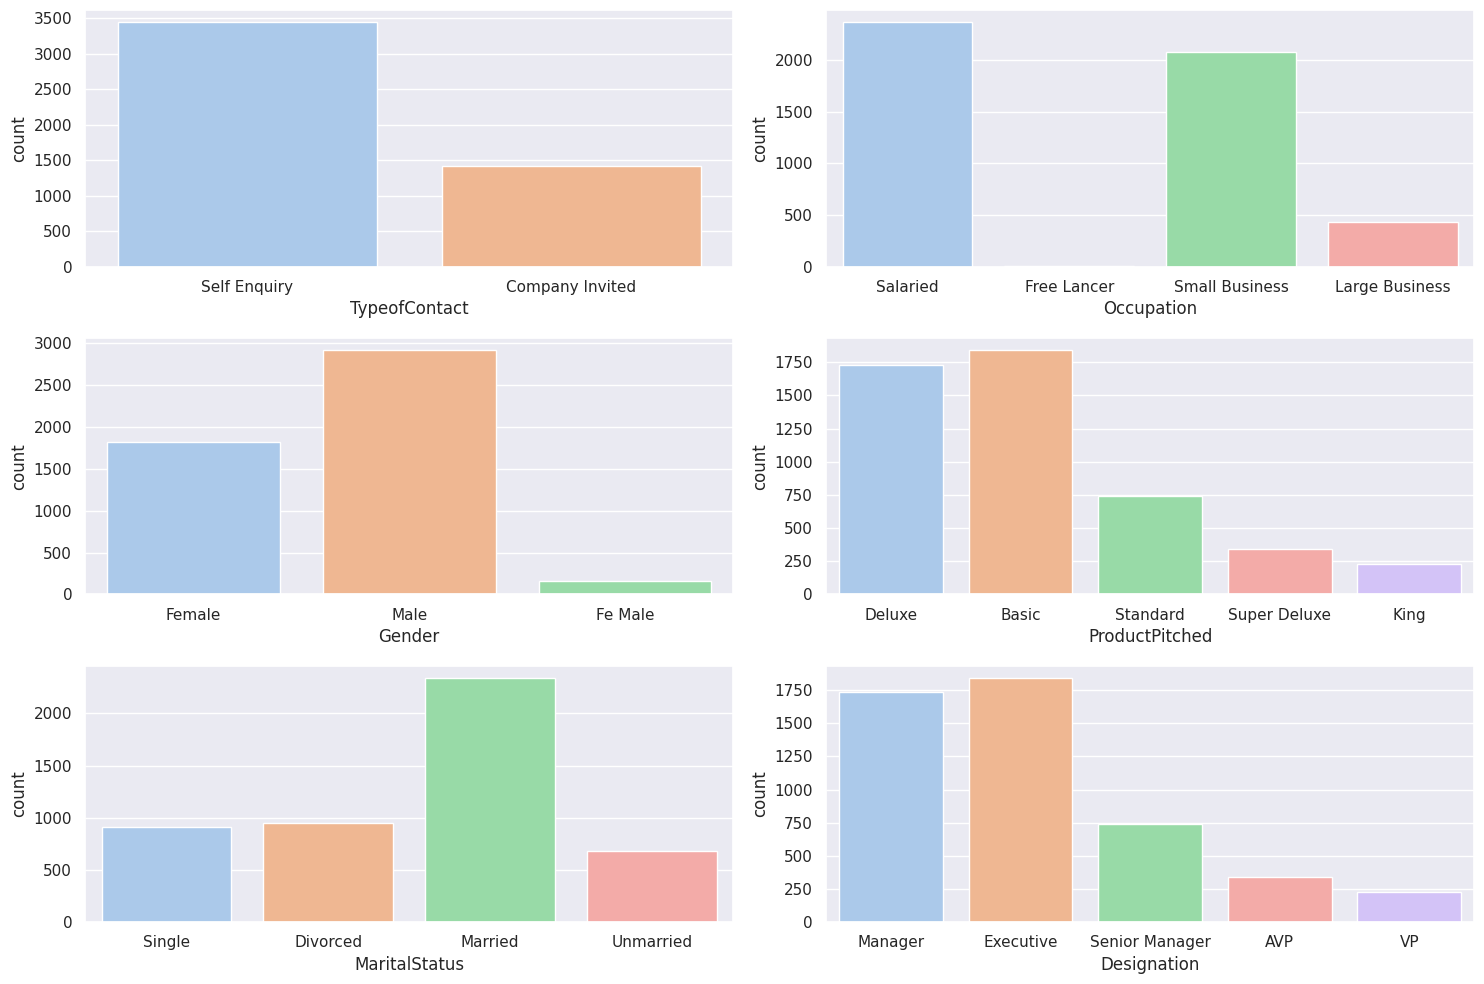

In [19]:
# plot kolom categorical
plt.figure(figsize=(15,10))
for i in range (len(categorical)):
    plt.subplot(3,2, i+1)
    sns.countplot(data=df, x=categorical[i])
    sns.set_theme(style="darkgrid", palette="pastel")
plt.tight_layout()

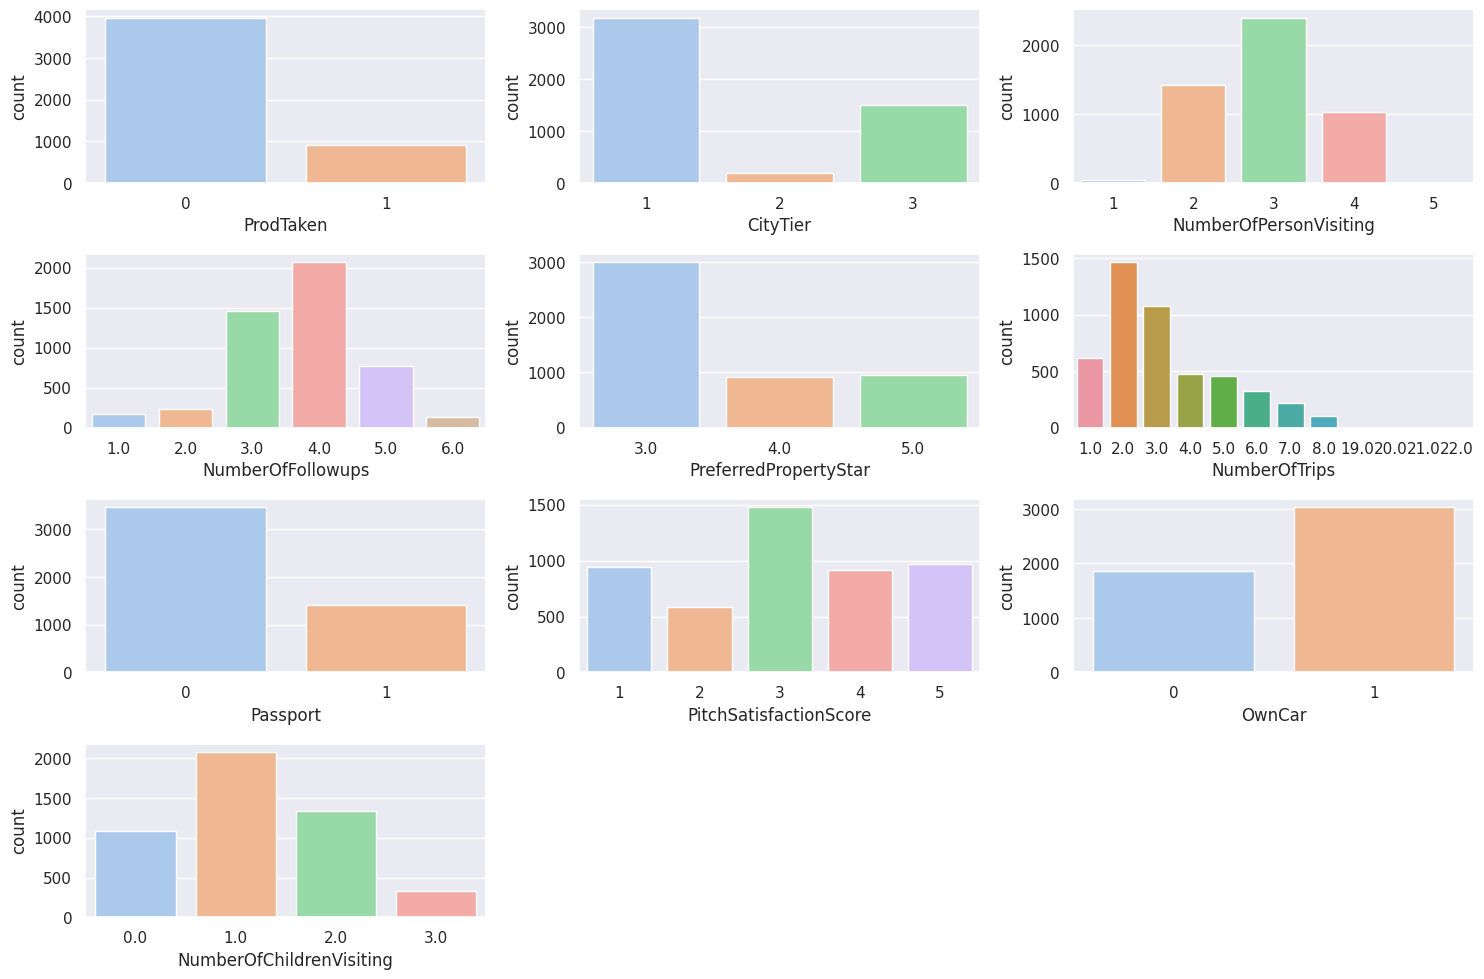

In [20]:
# plot kolom diskrit
plt.figure(figsize=(15,10))
for i in range(len(diskrit)):
    plt.subplot(4,3, i+1)
    sns.countplot(data=df, x=diskrit[i] )
    plt.tight_layout()

**HASIL OBSERVASI**

- Pada kolom `Age` distribusi datanya hampir mendekati normal.

- Pada kolom `DurationOfPitch` terlihat distribusinya positive skewed, dimana kebanyakan frekuensi data tersebar pada nilai < 20. Terlihat juga adanya outlier pada nilai > 120, sehingga nantinya akan kita ubah distribusinya menjadi normal pada saat pre-processing data.

- Pada kolom `MonthlyIncome` data tersebar pada nilai 20k-30k dan terdapat data outlier pada nilai < 10k dan > 80k. Sama seperti kolom `DurationOfPitch`, nantinya akan kita ubah distribusi datanya menjadi normal pada saat melakukan pre-processing data.

- Terdapat outlier pada kolom `NumberOfTrips`, dimana adanya nilai ekstrim yang mencapai < 19, sehingga nanti akan kita hilangkan outlier-nya pada saat pre-processing.

- Customer yang memiliki `Occupation` sebagai freelancer sangat sedikit (0,04%) jika dibandingkan dengan `Occupation` yang lain.

- Pada kolom target `ProdTaken`, terdapat class imbalance atau ketimpangan data, dimana customer yang mengambil paket liburan (ProdTaken = 1) memiliki frekuensi di bawah 1000. Sedangkan customer yang tidak mengambil paket wisata (ProdTaken = 0) berjumlah sangat dominan yaitu sekitar 4000 customer, sehingga ketimpangan data pada target harus diproses dengan undersampling atau oversampling pada saat data pre-processing nanti.

## **3. Multivariate Analysis**





<Axes: >

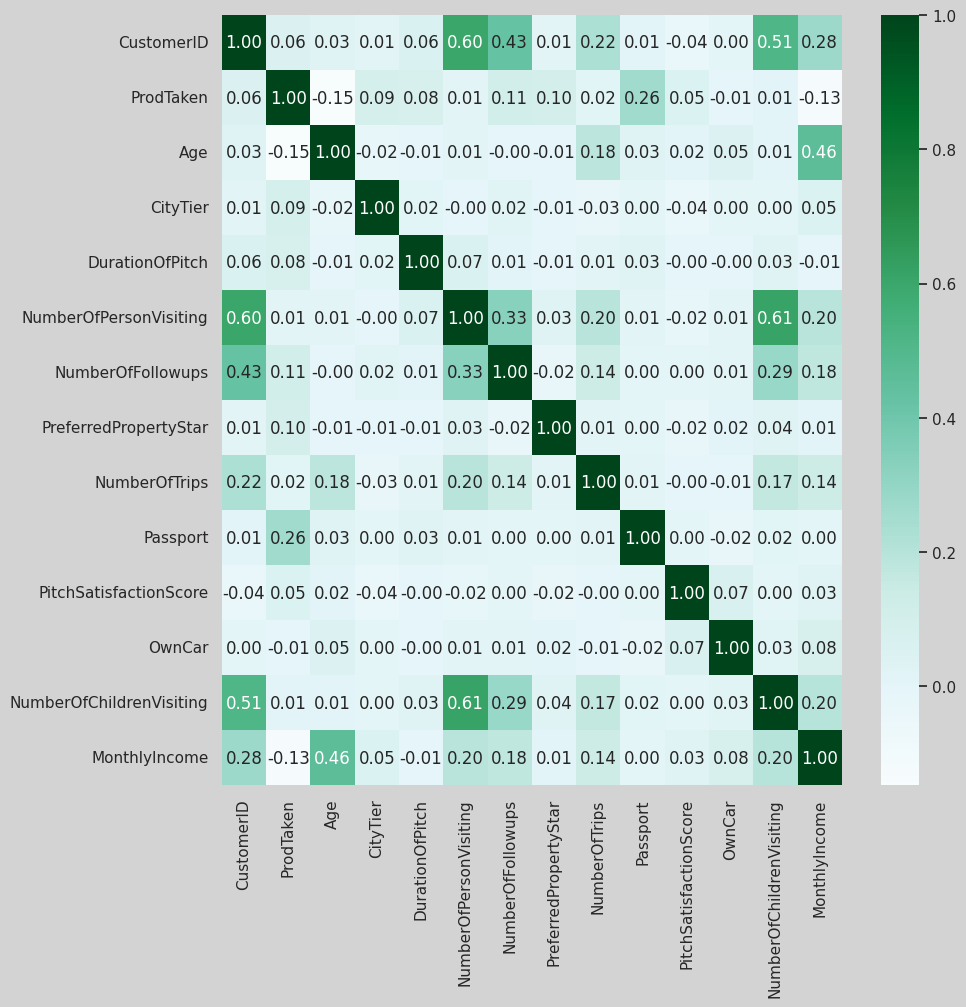

In [21]:
plt.figure(figsize=(10,10), facecolor='lightgray')
sns.heatmap(df.corr(), cmap='BuGn',annot=True, fmt='.2f')

<Figure size 2000x2000 with 0 Axes>

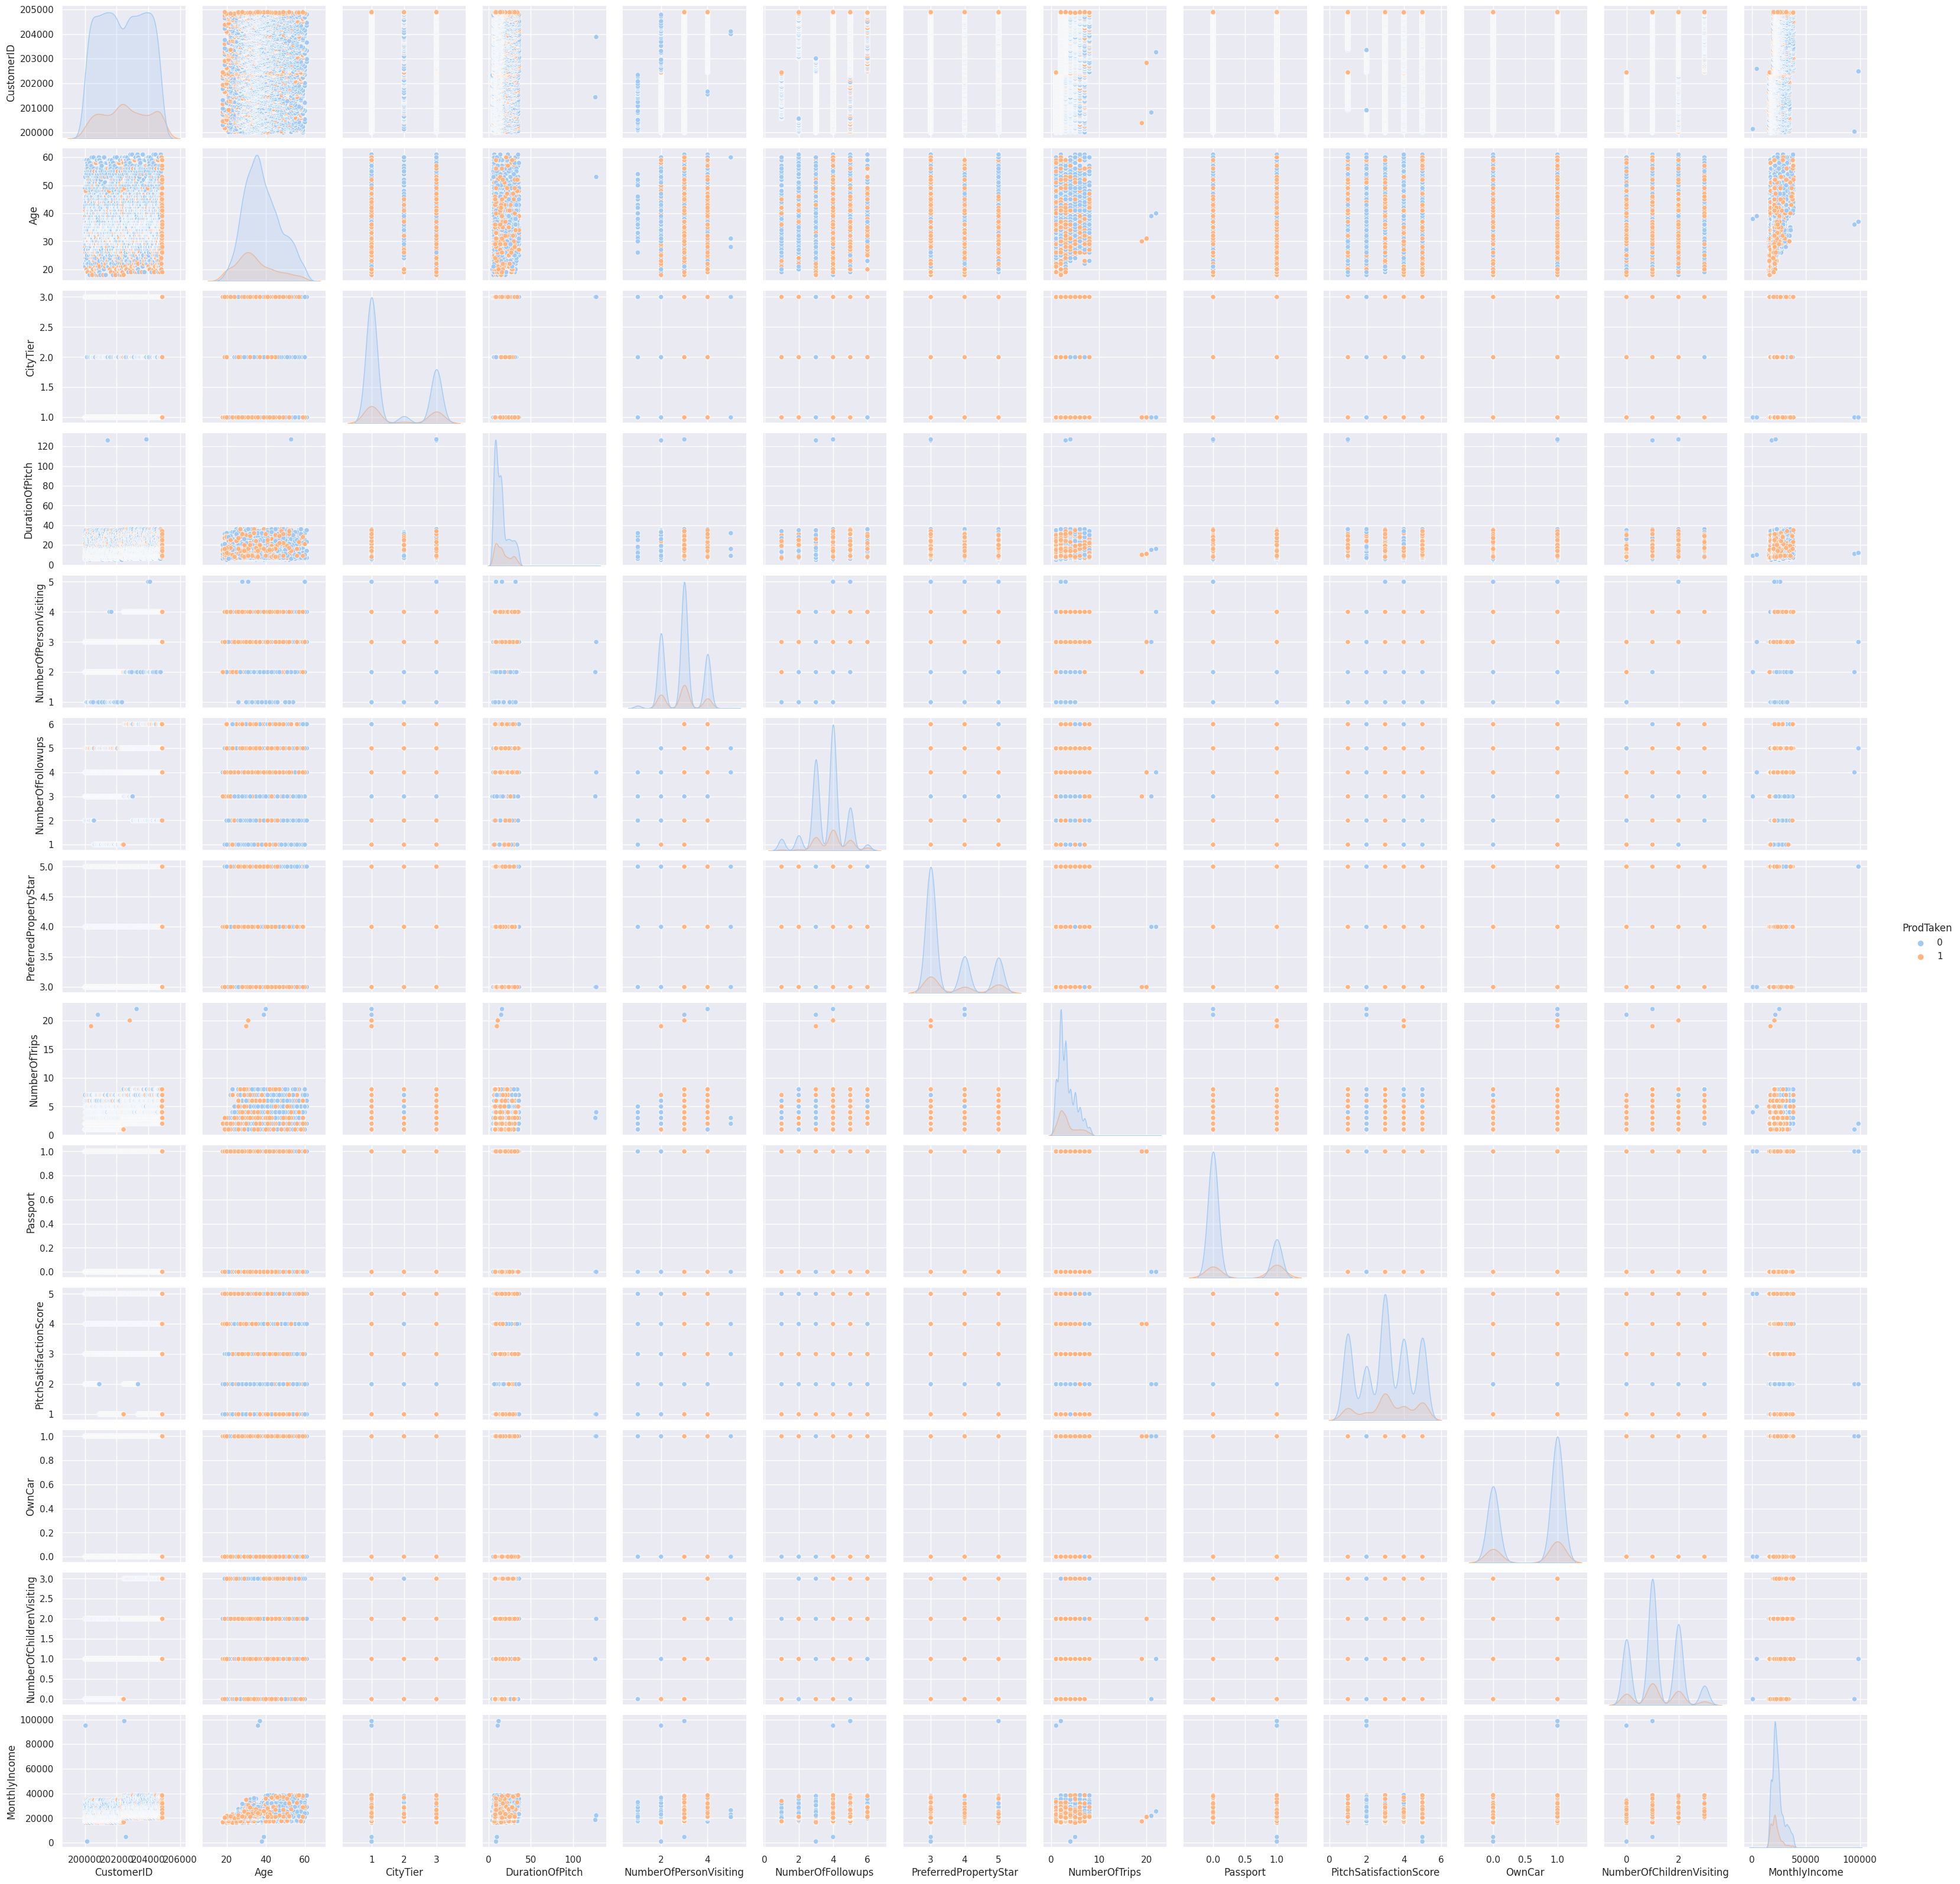

In [22]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='ProdTaken', palette='pastel')
plt.show()

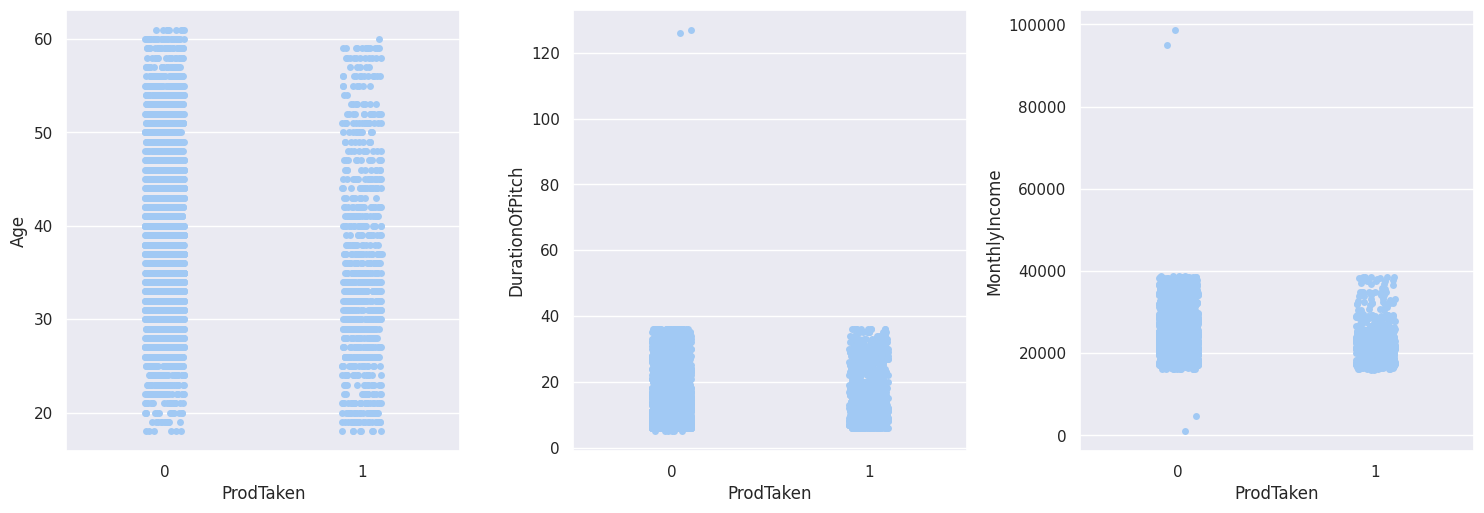

In [23]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='ProdTaken', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

**HASIL OBSERVASI**

- Dapat dilihat korelasi positif (walaupun lemah) pada variabel target kita yaitu `ProdTaken` dengan variabel `Passport`. Artinya semakin tinggi nilai passport customer (1), maka semakin tinggi pula nilai product taken-nya. Dengan kata lain, customer yang memiliki passport lebih cenderung membeli tawaran paket dibandingkan dengan customer yang tidak memiliki passport.

- Terdapat korelasi negatif antara variabel `Age` terhadap `ProdTaken` dan variabel `MonthlyIncome` terhadap `ProdTaken`, yang berarti semakin kecil nilai age atau monthly income-nya, maka semakin besar nilai product taken-nya. Dengan kata lain, customer yang berumur kecil/muda lebih cenderung membeli tawaran paket liburan dibandingkan dengan customer yang berumur tua, dan customer yang bergaji kecil cenderung membeli tawaran paket liburan dibandingkan dengan customer yang bergaji besar.

- Terdapat 2 fitur yang memiliki korelasi yang cukup kuat, yaitu `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` yang membentuk korelasi positif. Pada proses feature selection, kita dapat mengeliminasi fitur yang redundan (mempunyai informasi serupa) agar tidak terjadi overfitting pada model machine learning nantinya.

## **4. Business Insight**

### **1. Apakah kepemilikan Passport mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan?**

In [30]:
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [31]:
df_passport = df.groupby(['Passport','ProdTaken']).agg({'CustomerID' : ['nunique']}).reset_index()
df_passport.columns = ['Passport','ProdTaken','Total Customer']
df_passport

Passport  ProdTaken  Total Customer
0         0          0            3040
1         0          1             426
2         1          0             928
3         1          1             494

In [32]:
# menjumlahkan total customer per passport
df_passport1 = df_passport.groupby('Passport').agg({'Total Customer' : ['sum']}).reset_index()
df_passport1.columns = ['Passport','Total Customer per Passport']

# merge df yang tadi ke df yang lama
df_merge = df_passport.merge(df_passport1, on='Passport')

# membuat column baru yang berisikan persentase
df_merge['Percentage'] = round((df_merge['Total Customer'] / df_merge['Total Customer per Passport']) * 100,2)
df_merge

Passport  ProdTaken  Total Customer  Total Customer per Passport  \
0         0          0            3040                         3466   
1         0          1             426                         3466   
2         1          0             928                         1422   
3         1          1             494                         1422   

   Percentage  
0       87.71  
1       12.29  
2       65.26  
3       34.74

Text(0.8, 958, '928')

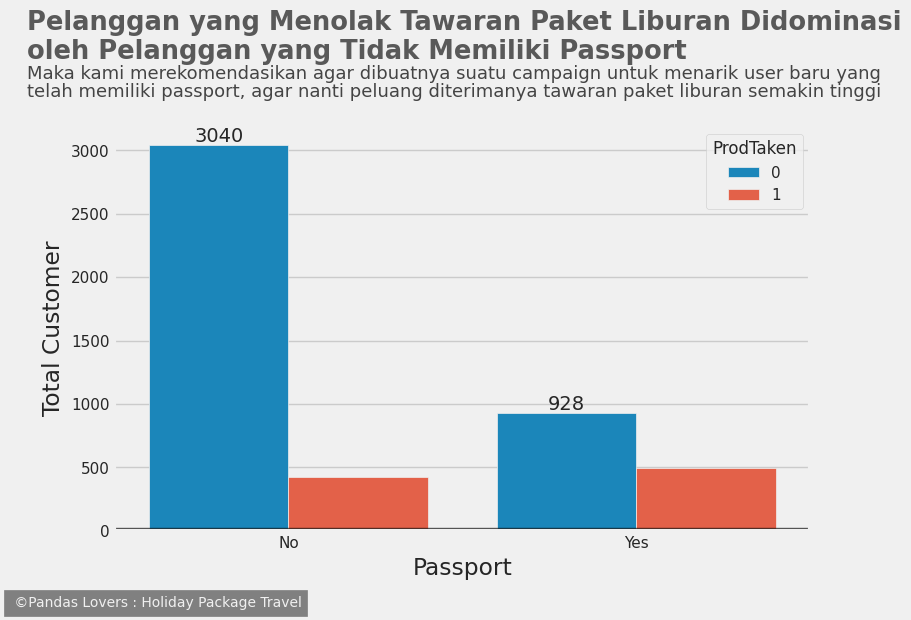

In [33]:
# membuat grafik
style.use('fivethirtyeight')

plt.figure(figsize=(8,5))

sns.barplot(x='Passport',y='Total Customer',data=df_merge,hue='ProdTaken')

plt.text(x = 0-0.75, y = 3950,
          s = 'Pelanggan yang Menolak Tawaran Paket Liburan Didominasi', 
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3725,
          s = 'oleh Pelanggan yang Tidak Memiliki Passport', 
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3560,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru yang', 
         fontsize = 13, alpha = .85)
plt.text(x = 0-0.75, y = 3420,
         s = 'telah memiliki passport, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi', 
         fontsize = 13, alpha = .85)
plt.text(x = -0.80, y = -600,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

plt.axhline(y = 0, color = 'black', linewidth = 5.3, alpha = .7)


plt.xticks(ticks=[0,1], labels=['No','Yes'])


plt.text(x = 0-0.20, y = 3040+30, s = "3040", ha='center')
plt.text(x = 1-0.20, y = 928+30, s = "928", ha='center')

### **2. Apakah umur mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-0.8, -0.008, ' ©Pandas Lovers : Holiday Package Travel')

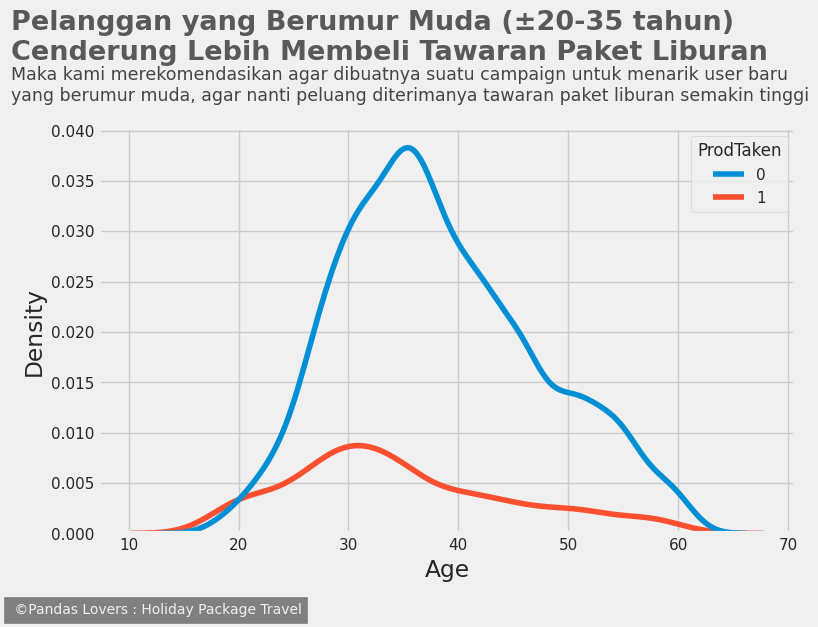

In [34]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='Age', data=df, hue='ProdTaken')

plt.text(x = 0-0.75, y = 0.050,
          s = 'Pelanggan yang Berumur Muda (±20-35 tahun)', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.047,
          s = 'Cenderung Lebih Membeli Tawaran Paket Liburan', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.045,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-0.75, y = 0.043,
         s = 'yang berumur muda, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi', 
         fontsize = 12.5, alpha = .85)
plt.text(x = -0.80, y = -0.008,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

### **3. Apakah gaji mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-16000, -2e-05, ' ©Pandas Lovers : Holiday Package Travel')

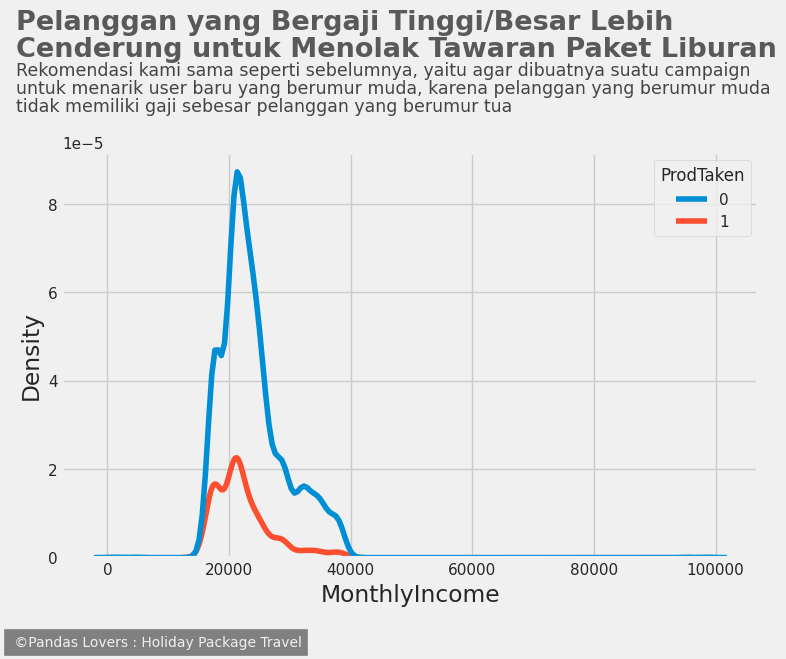

In [35]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='MonthlyIncome', data=df, hue='ProdTaken')
plt.text(x = 0-15000, y = 0.0001195,
          s = 'Pelanggan yang Bergaji Tinggi/Besar Lebih', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.0001135,
          s = 'Cenderung untuk Menolak Tawaran Paket Liburan', 
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.000109,
         s = 'Rekomendasi kami sama seperti sebelumnya, yaitu agar dibuatnya suatu campaign', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000105,
         s = 'untuk menarik user baru yang berumur muda, karena pelanggan yang berumur muda', 
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000101,
         s = 'tidak memiliki gaji sebesar pelanggan yang berumur tua', 
         fontsize = 12.5, alpha = .85)
plt.text(x = -16000, y = -0.00002,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10, 
               color = '#f0f0f0', backgroundcolor = 'grey')

# **DATA PRE-PROCESSING**

In [36]:
df_new =df.copy()

### **Handling Missing Value**

In [37]:
# Cek Missing Value
df_new.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Kolom yang tidak sesuai ada 8, karena nilainya kosong (Missing Valuenya ada 8) : Age (Ganti Mean), Typeofcontact (di drop), DurationOfPitch (median), NumberOfFollwups (modus), PreferredPropertyStar (drop), NumberOfTrips (drop) , NumberOfChildrenVisiting (drop), MonthlyIncome (median)

In [38]:
# Drop missing value
df_new.dropna(subset=['TypeofContact','NumberOfChildrenVisiting','PreferredPropertyStar','NumberOfTrips'], inplace=True)

In [39]:
# Imputasi Missing value dengan Mode, Median & Mean
df_new['Age'].fillna(df_new['Age'].mean(), inplace=True)
df_new['DurationOfPitch'].fillna(df_new['DurationOfPitch'].median(), inplace=True)
df_new['NumberOfFollowups'].fillna(df_new['NumberOfFollowups'].mode()[0], inplace=True)
df_new['MonthlyIncome'].fillna(df_new['MonthlyIncome'].median(), inplace=True)

In [40]:
# Cek Kembali Missing Value
df_new.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### **Handling Invalid Data Types**

In [41]:
#cek type data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4631 non-null   int64  
 1   ProdTaken                 4631 non-null   int64  
 2   Age                       4631 non-null   float64
 3   TypeofContact             4631 non-null   object 
 4   CityTier                  4631 non-null   int64  
 5   DurationOfPitch           4631 non-null   float64
 6   Occupation                4631 non-null   object 
 7   Gender                    4631 non-null   object 
 8   NumberOfPersonVisiting    4631 non-null   int64  
 9   NumberOfFollowups         4631 non-null   float64
 10  ProductPitched            4631 non-null   object 
 11  PreferredPropertyStar     4631 non-null   float64
 12  MaritalStatus             4631 non-null   object 
 13  NumberOfTrips             4631 non-null   float64
 14  Passport

In [42]:
#ubah tipe data dari float menjadi integer
df_new = df_new.astype({"Age":'int', "DurationOfPitch":'int','NumberOfFollowups':'int', 'PreferredPropertyStar':'int',
               "NumberOfTrips":'int', "NumberOfChildrenVisiting":'int', "MonthlyIncome":'int'})

In [43]:
#cek kembali type data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CustomerID                4631 non-null   int64 
 1   ProdTaken                 4631 non-null   int64 
 2   Age                       4631 non-null   int64 
 3   TypeofContact             4631 non-null   object
 4   CityTier                  4631 non-null   int64 
 5   DurationOfPitch           4631 non-null   int64 
 6   Occupation                4631 non-null   object
 7   Gender                    4631 non-null   object
 8   NumberOfPersonVisiting    4631 non-null   int64 
 9   NumberOfFollowups         4631 non-null   int64 
 10  ProductPitched            4631 non-null   object
 11  PreferredPropertyStar     4631 non-null   int64 
 12  MaritalStatus             4631 non-null   object
 13  NumberOfTrips             4631 non-null   int64 
 14  Passport                

### **Handling Duplicated Data**

In [44]:
print('Banyak data dan kolom : ',df_new.shape)
print('Jumlah ID Customer duplikat : ',df_new['CustomerID'].duplicated().sum())
print('Jumlah data duplikat',df_new.duplicated().sum())

Banyak data dan kolom :  (4631, 20)
Jumlah ID Customer duplikat :  0
Jumlah data duplikat 0


Tidak perlu ada yang di handling karena tidak terdapat data yang duplikat pada dataset ini

### **Handling Invalid Value**

In [45]:
#Ubah value Fe Male menjadi Female
df_new = df_new.replace('Fe Male', 'Female')

In [46]:
df_new['Gender'].value_counts()

Male      2765
Female    1866
Name: Gender, dtype: int64

In [47]:
#Ubah value Unmarried & Divorced menjadi Single
df_new['MaritalStatus'] = df_new['MaritalStatus'].replace(['Unmarried','Divorced'],'Single')

In [48]:
df_new['MaritalStatus'].value_counts()

Single     2427
Married    2204
Name: MaritalStatus, dtype: int64

### **Handling Outliers**

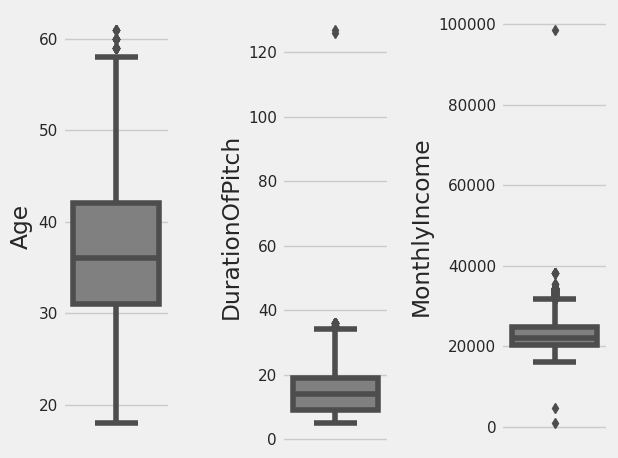

In [49]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df_new[num[i]], color='gray', orient='v')
    plt.tight_layout()

In [50]:
# count column before outlier detection

print(f'Number of rows before filtering outliers:{len(df_new)}')

# outlier detection

i = ['Age', 'MonthlyIncome', 'DurationOfPitch' ]

# outlier detection using Z-Score

z = np.abs(stats.zscore(df_new[i]))
df_new = df_new[(z < 3).all(axis=1)]


print(f'Number of rows after filtering outliers using Quantile:{len(df_new)}')

Number of rows before filtering outliers:4631
Number of rows after filtering outliers using Quantile:4617


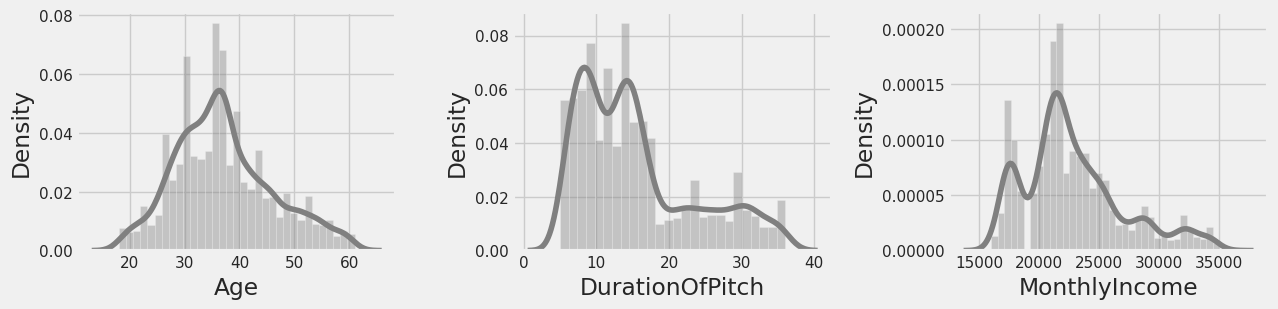

In [51]:
# show data distribution after outlier detection

plt.figure(figsize=(13, 9))
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df_new[num[i]], color='gray')
    plt.tight_layout()

### **Feature Transformation**

In [52]:
# DurationOfPitch dan MonthlyIncome kita re-scale
df_new['MonthlyIncome'] = MinMaxScaler().fit_transform(df_new['MonthlyIncome'].values.reshape(len(df_new), 1))
df_new['DurationOfPitch'] = MinMaxScaler().fit_transform(df_new['DurationOfPitch'].values.reshape(len(df_new), 1))

# Age kita standarisasi (karena distribusi datanya sudah mendekati normal)
df_new['Age'] = StandardScaler().fit_transform(df_new['Age'].values.reshape(len(df_new), 1))

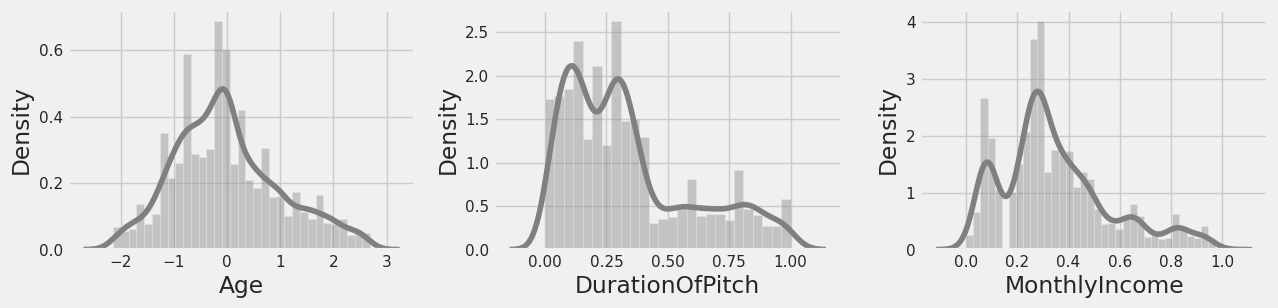

In [54]:
# data setelah di re-scale dan standarisasi
plt.figure(figsize=(13, 9))
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df_new[num[i]], color='gray')
    plt.tight_layout()

In [55]:
df_new.describe()

CustomerID    ProdTaken           Age     CityTier  DurationOfPitch  \
count    4617.000000  4617.000000  4.617000e+03  4617.000000      4617.000000   
mean   202397.158111     0.192766  3.708919e-16     1.659952         0.336547   
std      1409.592550     0.394513  1.000108e+00     0.919664         0.258763   
min    200000.000000     0.000000 -2.145762e+00     1.000000         0.000000   
25%    201179.000000     0.000000 -6.835929e-01     1.000000         0.129032   
50%    202356.000000     0.000000 -1.212201e-01     1.000000         0.290323   
75%    203625.000000     0.000000  5.536272e-01     3.000000         0.451613   
max    204887.000000     1.000000  2.690644e+00     3.000000         1.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4617.000000        4617.000000             4617.00000   
mean                 2.888456           3.691358                3.58003   
std                  0.726085           1.000778                0.79626   
min                  1.000000           1.000000                3.00000   
25%                  2.000000           3.000000                3.00000   
50%                  3.000000           4.000000                3.00000   
75%                  3.000000           4.000000                4.00000   
max                  5.000000           6.000000                5.00000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4617.000000  4617.000000             4617.000000  4617.000000   
mean        3.218973     0.293697                3.069742     0.614901   
std         1.848439     0.455504                1.363165     0.486671   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max        22.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count               4617.000000    4617.000000  
mean                   1.167858       0.349555  
std                    0.854810       0.212118  
min                    0.000000       0.000000  
25%                    1.000000       0.221080  
50%                    1.000000       0.304950  
75%                    2.000000       0.454280  
max                    3.000000       1.000000

### **Feature Encoding**

In [56]:
# onehots encoder pada Occupation dan TypeofContact
for cat in ['Occupation','TypeofContact']:
  onehots = pd.get_dummies(df_new[cat], prefix=cat)
  df_new = df_new.join(onehots)

In [57]:
# label encoder pada Gender
df_new['Gender'] = df_new['Gender'].astype('category').cat.codes

In [58]:
df_new['ProductPitched'].value_counts()

Basic           1822
Deluxe          1711
Standard         739
Super Deluxe     250
King              95
Name: ProductPitched, dtype: int64

In [59]:
#membuat function Product
def product(x):
    if x['ProductPitched'] == 'Basic':
        product = 0
    if x['ProductPitched'] == 'Standard':
        product = 1
    if x['ProductPitched'] == 'Deluxe':
        product = 2
    if x['ProductPitched'] == 'Super Deluxe':
        product = 3
    if x['ProductPitched'] == 'King':
        product = 4
    return product

In [60]:
#menjalankan function Product
df_new['ProductPitched'] = df_new.apply(lambda x: product(x), axis=1)

In [61]:
#membuat function MaritalStatus
def status(x):
    if x['MaritalStatus'] == 'Single':
        status = 0
    else:
        status = 1
    return status

#membuat kolom baru bernama 'IsMarried' yang menjalankan function grouping
df_new['IsMarried'] = df_new.apply(lambda x: status(x), axis=1)

In [62]:
#membuat function designation
def designation(x):
    if x['Designation'] == 'Executive':
        designation = 0
    if x['Designation'] == 'Manager':
        designation = 1
    if x['Designation'] == 'Senior Manager':
        designation = 2
    if x['Designation'] == 'AVP':
        designation = 3
    if x['Designation'] == 'VP':
        designation = 4
    return designation

In [63]:
df_new['Designation'] = df_new.apply(lambda x: designation(x), axis=1)
df_new.tail()

CustomerID  ProdTaken       Age    TypeofContact  CityTier  \
4883      204883          1  1.340949     Self Enquiry         3   
4884      204884          1 -1.021017  Company Invited         1   
4885      204885          1  1.678373     Self Enquiry         3   
4886      204886          1 -2.033288     Self Enquiry         3   
4887      204887          1 -0.121220     Self Enquiry         1   

      DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
4883         0.129032  Small Business       1                       3   
4884         0.838710        Salaried       1                       4   
4885         0.387097        Salaried       0                       4   
4886         0.354839  Small Business       1                       3   
4887         0.290323        Salaried       1                       4   

      NumberOfFollowups  ...  NumberOfChildrenVisiting  Designation  \
4883                  5  ...                         1            1   
4884                  5  ...                         2            0   
4885                  4  ...                         3            2   
4886                  4  ...                         2            0   
4887                  4  ...                         2            0   

     MonthlyIncome  Occupation_Free Lancer  Occupation_Large Business  \
4883      0.540401                       0                          0   
4884      0.266084                       0                          0   
4885      0.808581                       0                          0   
4886      0.218881                       0                          0   
4887      0.410760                       0                          0   

      Occupation_Salaried  Occupation_Small Business  \
4883                    0                          1   
4884                    1                          0   
4885                    1                          0   
4886                    0                          1   
4887                    1                          0   

      TypeofContact_Company Invited  TypeofContact_Self Enquiry  IsMarried  
4883                              0                           1          0  
4884                              1                           0          0  
4885                              0                           1          1  
4886                              0                           1          0  
4887                              0                           1          0  

[5 rows x 27 columns]

### **Feature Selection**

<Axes: >

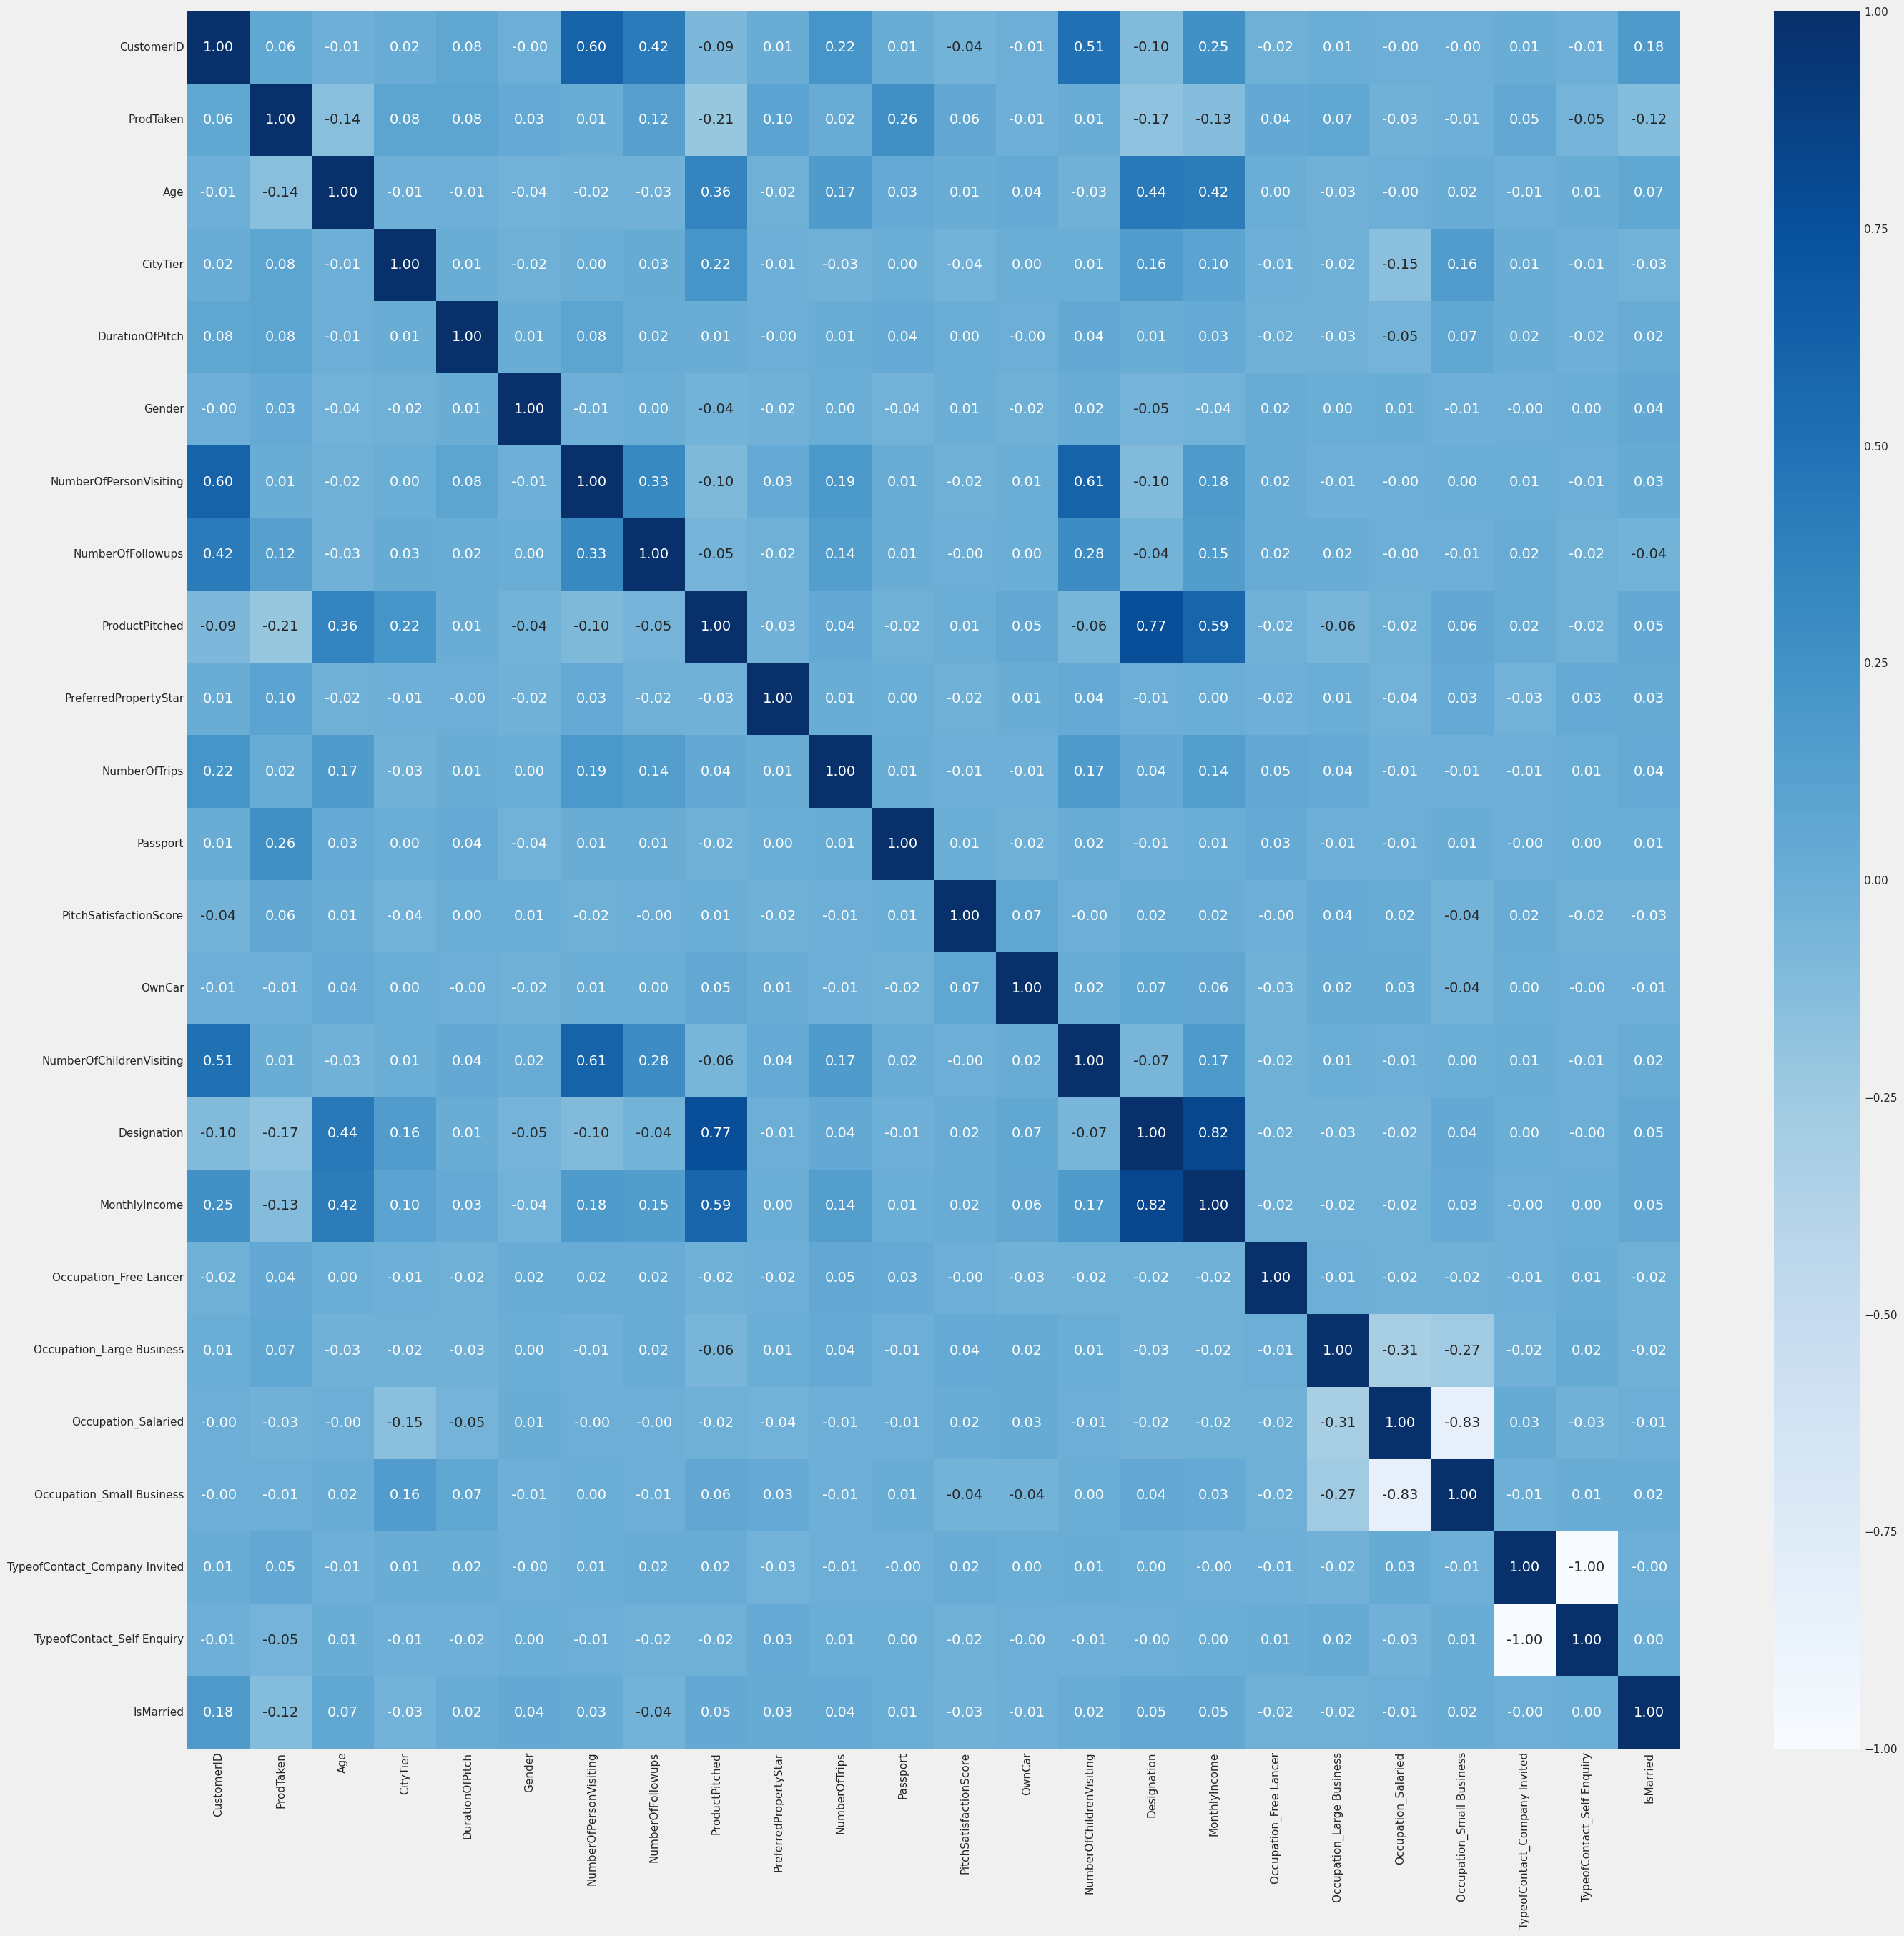

In [64]:
# Cek Nilai Korelasi

plt.figure(figsize=(30, 30))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

In [65]:
#Drop feature yang tidak terpakai atau korelasinya di bawah < 0,1 / -0,1
df_drop = df_new.drop(columns=['CustomerID','Occupation','TypeofContact','MaritalStatus','NumberOfPersonVisiting', 'Gender',
                         'NumberOfTrips','NumberOfChildrenVisiting', 'DurationOfPitch', 'OwnCar', 'PitchSatisfactionScore', 
                         'Designation', 'Occupation_Salaried', 'CityTier', 'Occupation_Large Business', 'Occupation_Free Lancer', 
                         'Occupation_Small Business', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry']).copy()

<Axes: >

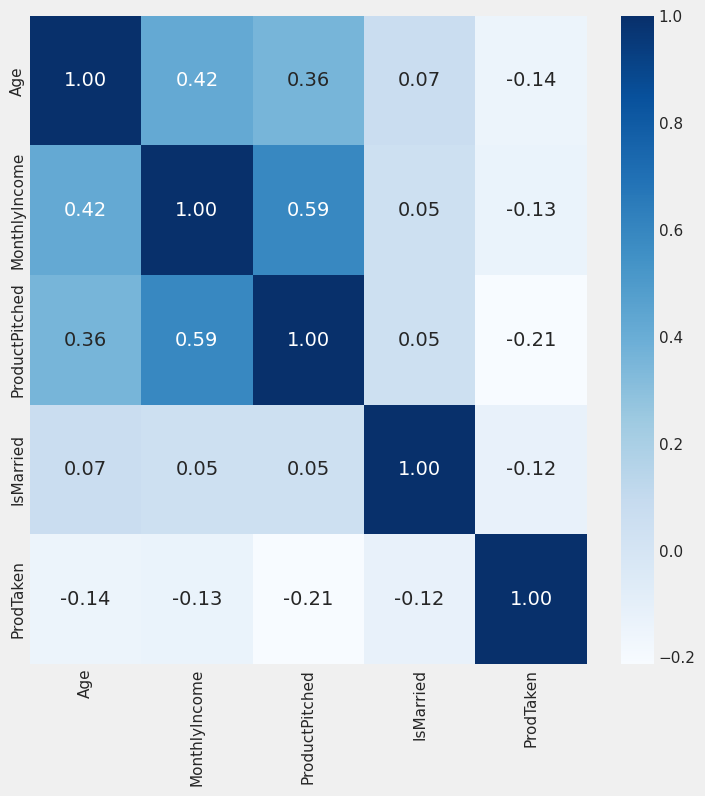

In [66]:
# ubah posisi ProdTaken ke paling kanan
df_drop = df_drop[['Age', 'MonthlyIncome', 'ProductPitched', 'IsMarried', 'ProdTaken']]
df_drop.head()

# Cek Korelasi Lagi

plt.figure(figsize=(8, 8))
sns.heatmap(df_drop.corr(), cmap='Blues', annot=True, fmt='.2f')

In [67]:
#cek isi data
df_drop.sample(5)

Age  MonthlyIncome  ProductPitched  IsMarried  ProdTaken
4594 -0.008746       0.375729               0          0          0
3777  1.116000       0.510535               1          1          1
656  -0.571118       0.091337               0          0          1
2114 -0.683593       0.068886               0          1          0
1951 -0.008746       0.133630               0          1          0

### **Splitting Data**

In [68]:
# pemisahan features vs target
X = df_drop.drop('ProdTaken', axis=1)
y = df_drop['ProdTaken'].values

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4617 non-null   float64
 1   MonthlyIncome   4617 non-null   float64
 2   ProductPitched  4617 non-null   int64  
 3   IsMarried       4617 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 309.4 KB


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Handling Class Imbalance**

In [73]:
from sklearn.model_selection import train_test_split
# membagi data train dan test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Jumlah data latih  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

print(f'Jumlah data uji terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_test==0)}')
print(f'Jumlah class 1 : {sum(y_test==1)}\n')

Jumlah data latih  terdiri dari 3231 baris
Jumlah class 0 : 2601
Jumlah class 1 : 630

Jumlah data uji terdiri dari 1386 baris
Jumlah class 0 : 1126
Jumlah class 1 : 260



# **MACHINE LEARNING MODELLING & EVALUATION**

In [74]:
#belum
from imblearn.over_sampling import SMOTE
print(f'Jumlah data uji sebelum SMOTE terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

smote = SMOTE(sampling_strategy=1,random_state=42)
x_train,y_train = smote.fit_resample(X_train,y_train)

print(f'Jumlah data uji setelah SMOTE terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

Jumlah data uji sebelum SMOTE terdiri dari 3231 baris
Jumlah class 0 : 2601
Jumlah class 1 : 630

Jumlah data uji setelah SMOTE terdiri dari 3231 baris
Jumlah class 0 : 2601
Jumlah class 1 : 2601

